In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

np.random.seed(42) ka use random operations ko reproducible banane ke liye hota hai.

  Jab aap random numbers generate karte hain (jaise train-test split, random sampling, ya algorithm initialization), har baar different results aate
  hain. Seed set karne se same random sequence milti hai har run pe.

  42 ek popular choice hai (Hitchhiker's Guide to the Galaxy reference), lekin koi bhi number use kar sakte hain. Ye debugging aur results share karne
   me helpful hai.

In [3]:
np.random.seed(42)

# make_circles function ka ye specific configuration use karne ke reasons:

#   1. n_samples=500 - 500 data points generate karta hai, jo AdaBoost demo ke liye sufficient hai without being too computationally expensive
#   2. factor=0.1 - Inner circle ko outer circle ke 10% size ka banata hai. Ye tight concentric circles create karta hai jo linearly separable nahi hote
#    - perfect for demonstrating ki AdaBoost kaise non-linear boundaries learn kar sakta hai
#   3. noise=0.35 - Data points me 35% noise add karta hai, jo real-world messy data ko simulate karta hai. Ye AdaBoost ki robustness test karne ke liye
#    achha hai
#   4. random_state=42 - Reproducibility ke liye, taaki same circles pattern mile har baar

#   Ye setup specifically AdaBoost ki strength dikhane ke liye hai - complex non-linear patterns ko handle karna with noisy data.
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
X

array([[-9.32386218e-02,  2.99041641e-01],
       [ 4.15898414e-01,  1.11023783e+00],
       [ 9.87505098e-02,  5.43766155e-02],
       [-3.18616104e-01, -4.98557102e-01],
       [-6.01736430e-01,  1.13675809e+00],
       [-9.36913945e-03, -1.40794778e-01],
       [ 5.63275761e-02,  3.92660379e-01],
       [-8.24184824e-01,  3.96353598e-01],
       [-3.71931480e-01,  6.86631947e-01],
       [-1.59861466e-01, -5.38689457e-01],
       [ 1.01313173e+00,  7.37618759e-02],
       [ 5.93211139e-01, -1.43861447e+00],
       [ 4.73069369e-01, -4.13685114e-01],
       [-9.47820332e-01,  5.68898692e-01],
       [ 5.83452928e-01, -3.99362660e-03],
       [ 9.05925986e-02, -9.64564692e-02],
       [ 6.76839485e-02, -1.89591342e-01],
       [ 7.46729013e-01,  8.57657068e-01],
       [ 5.78621809e-01, -5.56450745e-01],
       [ 4.96253827e-01,  1.11034838e-01],
       [-3.18586578e-02, -2.16572208e-01],
       [ 4.62739163e-01,  5.77154123e-02],
       [-4.64025929e-01,  1.95529072e-01],
       [ 3.

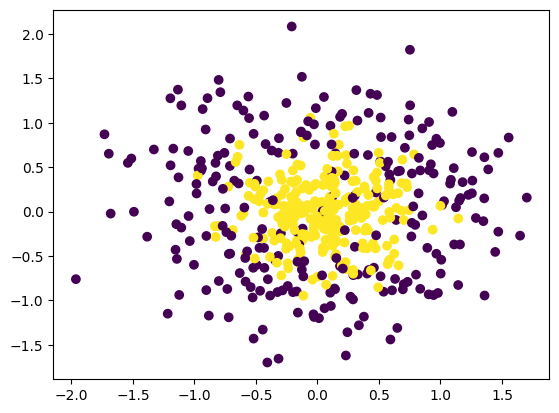

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

explain cross_val_score kya karta hai behind the scenes in this case?

cross_val_score(abc, X, y, scoring='accuracy', cv=10) is case me behind the scenes ye steps follow karta hai:

  1. 10-Fold Split - Pura data (500 samples) ko 10 equal parts me divide karta hai. Har fold me approximately 50 samples honge.
  2. 10 Iterations - Har iteration me:
    - 9 folds ko training data banata hai (450 samples)
    - 1 fold ko test data banata hai (50 samples)
    - Naya AdaBoostClassifier object create karta hai (abc ki copy)
    - Is classifier ko 450 samples pe train karta hai
    - Remaining 50 samples pe predictions generate karta hai
    - Accuracy calculate karta hai (correct predictions / total predictions)
  3. Rotation - Har iteration me different fold test set banta hai, taaki saare samples ek baar test set me aaye.
  4. Return - 10 accuracy scores ka array return karta hai (ek score per fold).

  Is case me aapne np.mean() use kiya hai, jo average accuracy (0.786) deta hai across all 10 folds. Ye approach overfitting avoid karne aur model ki
  true performance estimate karne me help karti hai.

==============================================================================
  iss case mein overfitting kese avoid hoti hai?

⏺ Cross-validation se overfitting kaise avoid hoti hai:

  1. Training-Test Separation - Har fold me model jo data pe train hota hai, uspe test NAHI hota. Model ko unseen data pe evaluate kiya jata hai, jo
  real-world performance ka better estimate deta hai.
  2. Multiple Models - Single model train karne ke bajay, 10 different models train hote hain different data subsets pe. Agar koi ek model specific
  training data pe overfit kar bhi jaye, baaki models compensate kar dete hain.
  3. No Data Leakage - Kyunki test data training me use nahi hota, model test patterns memorize nahi kar sakta. Single train-test split me agar test
  set bahut easy ya specific ho, to misleading results aa sakte hain.
  4. Variance Reduction - 10 different accuracy scores milte hain. Agar model overfit kar raha hota, to kuch folds pe bahut high accuracy aur kuch pe
  bahut low aati. Average lene se stable estimate milta hai.

  Is case me 0.786 accuracy ka matlab hai ki model consistently ~78% accuracy de raha hai across different data splits, jo indicate karta hai ki model
   generalize kar pa raha hai, sirf training data memorize nahi kar raha.



==============================================================================


   scoring mein hum aur kaunsi value de sakte hain.woh calculate kese hoti hain?

⏺ Cross-validation me common scoring metrics aur unke calculations:

  Classification ke liye:

  1. 'accuracy' - (Correct Predictions / Total Predictions)
  2. 'precision' - (True Positives / (True Positives + False Positives))
  3. 'recall' - (True Positives / (True Positives + False Negatives))
  4. 'f1' - 2 * (Precision * Recall) / (Precision + Recall)
  5. 'roc_auc' - Area Under ROC Curve (True Positive Rate vs False Positive Rate)
  6. 'neg_log_loss' - Negative log likelihood (probabilistic predictions ki accuracy)

  Regression ke liye:

  1. 'r2' - R-squared score
  2. 'neg_mean_squared_error' - -MSE
  3. 'neg_mean_absolute_error' - -MAE

  Example usage:
  # Precision check karne ke liye
  cross_val_score(abc, X, y, scoring='precision', cv=10)

  # Multiple metrics ek saath
  from sklearn.model_selection import cross_validate
  scores = cross_validate(abc, X, y,
                         scoring=['accuracy', 'precision', 'recall'],
                         cv=10)

  Har metric different use case ke liye important hai - jaise medical diagnosis me high recall chahiye (kam false negatives), spam detection me high
  precision (kam false positives).

In [90]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

0.786

In [91]:
abc.fit(X,y)

AdaBoostClassifier()

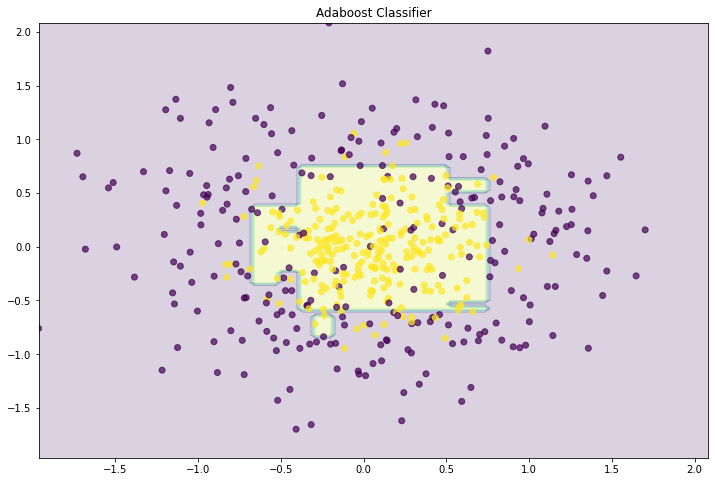

In [92]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

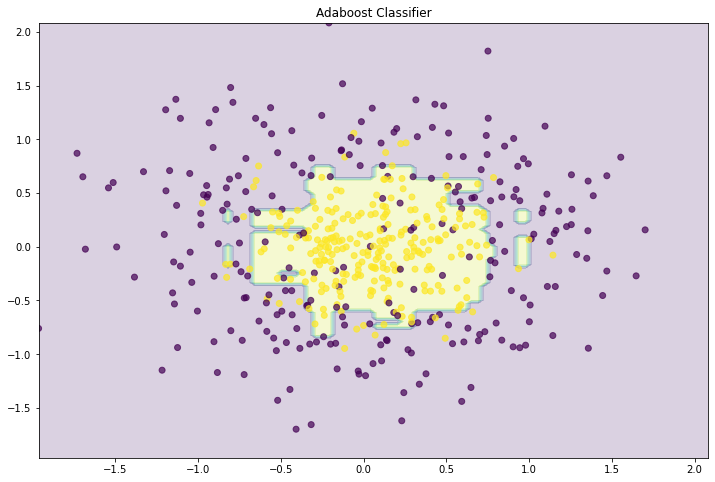

In [99]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

In [76]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


In [ ]:
# Link
https://stats.stackexchange.com/questions/82323/shrinkage-parameter-in-adaboost